In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = load_iris()
# Get features and target
X=data.data
y=data.target

y = pd.get_dummies(y).values
print(X)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(130, 4)
(130, 3)
(20, 4)
(20, 3)


In [ ]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# initializing weight for the output layer
V = np.random.normal(scale=0.5, size=(hidden_size , output_size))

print(W)
print(V)

[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]
[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):

    # feedforward propagation
    # on hidden layer
    Hin = np.dot(X_train, W) # 130*4  **  4*2
    Hout = sigmoid(Hin)

    # on output layer
    Yin = np.dot(Hout, V) # 130*2  **  2*3
    Yout = sigmoid(Yin)


    # Calculating error
    mse = mean_squared_error(Yout, y_train)
    acc = accuracy(Yout, y_train)
    #results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    results = pd.concat([results, pd.DataFrame({"mse":[mse], "accuracy":[acc]})], ignore_index=True) # Change to concat instead of append



    # backpropagation
    V_part = (Yout - y_train)  * Yout * (1 - Yout) # 130*3
    W_part = (np.dot(V_part, V.T)) * Hout * (1 -  Hout) # (130*3 * 3*2) w_part 130*2

    # weight updates
    V_update = np.dot(Hout.T,   V_part) / N
    W_update = np.dot(X_train.T, W_part) / N
    if itr ==1:
      print(V_part.shape)
      print(Hout.shape)
      print(V_update.shape)
      print("-----------")
      print(W_part.shape)
      print(X_train.shape)
      print(W_update.shape)

    V = V - learning_rate * V_update
    W = W - learning_rate * W_update

(130, 3)
(130, 2)
(2, 3)
-----------
(130, 2)
(130, 4)
(4, 2)


<ipython-input-21-044a7eefe3e3>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({"mse":[mse], "accuracy":[acc]})], ignore_index=True) # Change to concat instead of append


<Axes: title={'center': 'Mean Squared Error'}>

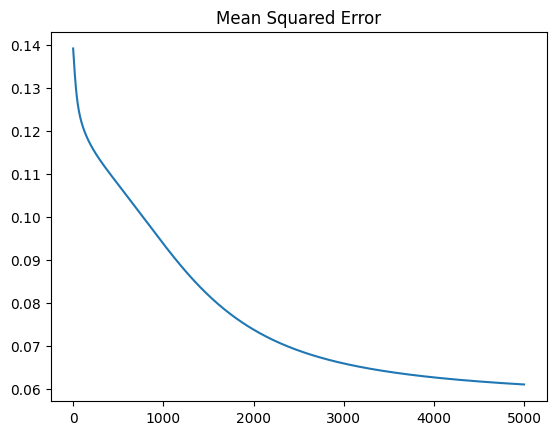

In [ ]:
results.mse.plot(title="Mean Squared Error")
#print(results)


<Axes: title={'center': 'Accuracy'}>

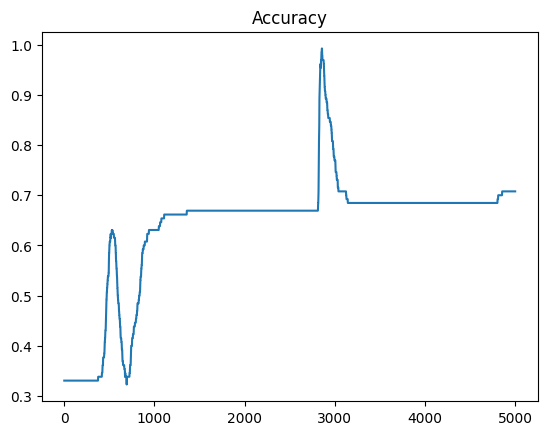

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
# feedforward
Z1 = np.dot(X_test, W)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, V)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8
